# Algorithms in Bioinformatics / HW 4

## Theoretical part (Tasks 1-2)

**Restriction Site Model ACGT**

(the theory below is retrieved from A. Mironov's book (the link is here: https://teach-in.ru/file/synopsis/pdf/bioinformatics-mironov-M1.pdf))

As a biological task, we will choose a problem that can be solved with use of the HMM building:

We have ACGT restriction site. Our task is to build a hidden Markov model to search for such restriction sites.

We have the start state *(B, background)*, and we generate different letters one after another with a probability of 0.25 (so we have: letters, restriction site, letters).

How we may describe the site? How many states will it have? 

It will have four states: 

A (emission probabilities - A - 1, C - 0, G - 0, T - 0). Then, if we have entered the first state (the state of the first position of the site), then the second position will necessarily be (probability is 1) position C (0 1 0 0), then the third position of the site will - with probability 1 we go to state G (0 0 1 0). Next, we move to the fourth position of the site (the transition probability is strictly equal to 1) G (0 0 0 1).After the site is over, we may go back to the background or go to the end.. For graphical representation of this model, see Picture 1 below (Task 1 - completed):

Thus, we have modeled the ACGT restriction site inside a seq.

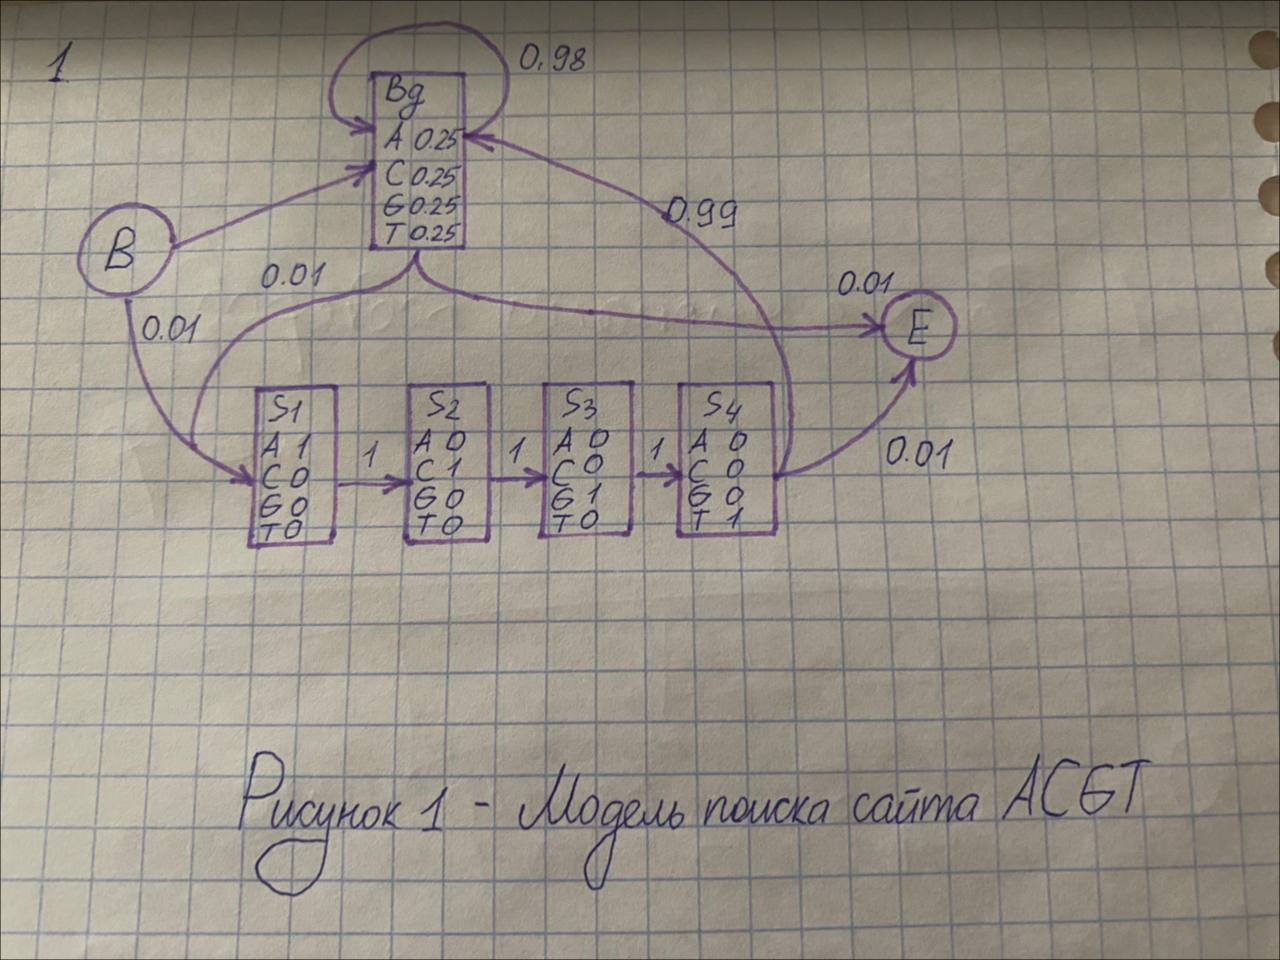

Task:

Build a Hidden Markov Model (HMM) to search for ACGT restriction site. 

The transition probabilities from the site and from the background to the end of the sequence are equal to: a(Bg → E) = a(site → E)=
0.01. 

The transition probability from the background to the site is equal to a(Bg → site)=0.01.

The emission probabilities of background are all equal to 0.25.

1-2. Draw a model (has completed above) (+"Recover the missing probabilities").

Moreover, it is worth to mention the model features:

1) This model allows the presence of a site at the very beginning and at the very end of the sequence; At the end of the site, we will not definitely enter the background state, i.e. we can immediately enter the end state.

2) Also, this model does not allow us to put the two sites in a row. For example, the ACGTACGT situation cannot be generated by this model (provided that both parts are restriction sites); so, this model does not recognize two sites glued together. / p.s. if we want to allow the existence of two consecutive sites, we must put a transition from the end of the site to the beginning.

## Viterbi algorithm 

3. Write a program implementing the Viterbi algorithm for this model.

In addition, to check whether this program finds the restriction sites plus to replace the transition probabilities from background to the site with the values a(Bg→site) = 0.001 and check then how the sites are identified in this case.

In [ ]:
import pandas as pd

# state transition probabilities
probability_site = 0.01
probs = pd.DataFrame(columns=["Bg", "site", "E"],index=["Bg", "site", "E"])
probs.at["Bg","E"] = 0.01
probs.at["Bg","site"] = probability_site
probs.at["Bg","Bg"] = 1-probability_site-probs.at["Bg","E"]
probs.at["site","E"] = 0.01
probs.at["site","Bg"] = 1-probs.at["site","E"]
probs

# this allows to reconstruct the state transition probabilities (another way to solve Task 2).

,Bg,site,E
Bg,0.98,0.01,0.01
site,0.99,NaN,0.01
E,NaN,NaN,NaN


In [ ]:
restriction_site = "acgt"

# sample data:
seq = "gataggattatcattcataagtttcagagcaatgtccttattctggaacttggatttatggctcttttggtttaatttcgcctgattcttgatctcctttagcttctcgacgtgggcctttttcttgccatatggatccgctgcacggtcctgttccctagcatgtacgtgagcgtatttccttttaaaccacgacgctttgtcttcattcaacgtttcccattgtttttttctactattgctttgctgtgggaaaaacttatcgaaagatgacgactttttcttaattctcgttttaagagcttggtgagcgctaggagtcactgccag"

In [ ]:
def state(probability_site):
  state = [] # state for each position
  state.append("Bg")
  i = 0
  while i<(len(seq)-1): #
    if i<(len(seq)-5): # ACGT
      if seq[i+1:i+5] == restriction_site: 
        probs_Bg = probs.loc["Bg","Bg"]**5*0.25**4 # extract data by .loc - row, column
        probability_site = probs.loc["Bg","site"]*probs.loc["site","Bg"]
        if probs_Bg>probability_site:
          state.append("Bg")
          i=i+1
        else:
          state.append("site")
          state.append("site")
          state.append("site")
          state.append("site")
          i=i+4
      else:
        state.append("Bg")
        i=i+1
    elif i==len(seq)-5: # ACGT]
      if seq[i+1:i+5] == restriction_site: 
        probs_Bg = probs.loc["Bg","Bg"]**4*0.25**4*probs.loc["Bg","E"]
        probability_site = probs.loc["Bg","site"]*probs.loc["site","E"]
        if probs_Bg>probs_site:
          state.append("Bg")
          i=i+1
        else:
          state.append("site")
          state.append("site")
          state.append("site")
          state.append("site")
          i=i+4
      else:
        state.append("Bg")
        i=i+1
    else:
      state.append("Bg")
      i=i+1
  return state

In [ ]:
state1 = state(0.01) 
state1

['Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'site',
 'site',
 'site',
 'site',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg'

In [ ]:
[i for i,value in enumerate(state1) if value=="site"]

[109, 110, 111, 112, 166, 167, 168, 169, 212, 213, 214, 215]

As it is shown above, there are three (ACGT) restriction sites: coordinates - 109, 166, 212.

In [ ]:
# if we replace the transition probability a(Bg → site) into 0.001:

probability_site = 0.001
probs.at["Bg","site"] = probability_site
probs.at["Bg","Bg"] = 1-probability_site-probs.at["Bg","E"]
# .. same smth of them
probs

,Bg,site,E
Bg,0.989,0.001,0.01
site,0.99,NaN,0.01
E,NaN,NaN,NaN


In [ ]:
state2 = state(0.001) 
state2

['Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',
 'Bg',

In [ ]:
[i for i,value in enumerate(state2) if value=="site"]

[]

In this case (the replacement of the transition probability), we have no any restriction sites in the sample sequence.

## Forward-Backward algorithm

4. Write a program with the Forward-Backward algorithm implementation. 

Then, we need to check how it works on different transition probabilities a(Bg→site) (let's say 0.001); after that, let's plot the graphs for site and background probabilities (for each of the two cases).

In [ ]:
# Forward part

def forward(probability_site):
  forward_Bg = []
  forward_site = []
  forward_Bg.append(1)
  forward_site.append(0)
  i=0

  while i<(len(seq)-1):
    if seq[i+1:i+5] == restriction_site:
      forward_Bg.append(probs.loc["Bg","Bg"]*0.25*forward_Bg[i]+probs.loc["site","Bg"]*0.25*forward_site[i])
      forward_site.append(probs.loc["Bg","site"]*forward_Bg[i])
      i=i+1
      forward_Bg.append(probs.loc["Bg","Bg"]*0.25*forward_Bg[i])
      forward_site.append(forward_site[i])
      i=i+1
      forward_Bg.append(probs.loc["Bg","Bg"]*0.25*forward_Bg[i])
      forward_site.append(forward_site[i])
      i=i+1
      forward_Bg.append(probs.loc["Bg","Bg"]*0.25*forward_Bg[i])
      forward_site.append(forward_site[i])
      i=i+1
    else:
      forward_site.append(0)
      forward_Bg.append(forward_Bg[i]*0.25*probs.loc["Bg","Bg"]+probs.loc["site","Bg"]*0.25*forward_site[i])
      i=i+1
      
  return forward_Bg, forward_site

In [ ]:
forward_Bg1, forward_site1 = forward(0.01) # for a(Bg→site) = 0.01

In [ ]:
## check the coordinates of restriction sites
[i for i,value in enumerate(forward_site1) if value>0]

# the same as in the case of the Viterbi algorithm

[109, 110, 111, 112, 166, 167, 168, 169, 212, 213, 214, 215]

In [ ]:
# Backward part

def backward(probability_site):
  backward_Bg = []
  backward_site = []
  backward_Bg.append(1)
  backward_site.append(0)
  i=len(seq)-1

  while i>0:
    if seq[-i:4-i] == restriction_site:
      backward_Bg.append(probs.loc["Bg","Bg"]*0.25*backward_Bg[len(seq)-1-i]+probs.loc["site","Bg"]*0.25*backward_site[len(seq)-1-i])
      backward_site.append(probs.loc["Bg","site"]*backward_Bg[len(seq)-1-i])
      i=i-1
      backward_Bg.append(probs.loc["Bg","Bg"]*0.25*backward_Bg[len(seq)-1-i])
      backward_site.append(backward_site[len(seq)-1-i])
      i=i-1
      backward_Bg.append(probs.loc["Bg","Bg"]*0.25*backward_Bg[len(seq)-1-i])
      backward_site.append(backward_site[len(seq)-1-i])
      i=i-1
      backward_Bg.append(probs.loc["Bg","Bg"]*0.25*backward_Bg[len(seq)-1-i])
      backward_site.append(backward_site[len(seq)-1-i])
      i=i-1
    else:
      backward_site.append(0)
      backward_Bg.append(backward_Bg[len(seq)-1-i]*0.25*probs.loc["Bg","Bg"]+probs.loc["site","Bg"]*0.25*backward_site[len(seq)-1-i])
      i=i-1

  return backward_Bg, backward_site

In [ ]:
backward_Bg1, backward_site1 = backward(0.01) # for a(Bg→site) = 0.01

In [ ]:
## check the coordinates of restriction sites
[i for i,value in enumerate(backward_site1) if value>0]

# the same as in the case of the Viterbi algorithm

[109, 110, 111, 112, 166, 167, 168, 169, 212, 213, 214, 215]

In [ ]:
# So, the resulted values for restriction sites identification are the same - this is good (according to the rule from A. Mironov's book), i.e.
# '..Right and left recursion should result in the same value..'

After that, let's count both the site and the background probabilities and plot the resulted values:

In [ ]:
probability_site1 = []
probability_Bg1 = []

for i in range(len(seq)):
  probability_site1.append(forward_site1[i]*backward_site1[i])
  probability_Bg1.append(forward_Bg1[i]*backward_Bg1[i])

In [ ]:
# same steps for the 2nd case - for a(Bg→site) = 0.001

forward_Bg2, forward_site2 = forward(0.001) 
backward_Bg2, backward_site2 = backward(0.001) 

In [ ]:
## check the coordinates of restriction sites
[i for i,value in enumerate(forward_site2) if value>0]

# it has identified restriction sited at 0.001 (in comparison w/ the Viterbi algorithm)

[109, 110, 111, 112, 166, 167, 168, 169, 212, 213, 214, 215]

p.s. I suppose it may be a mistake related to forward_site2 and background_site2 identification. to know better about it from S. Spirin or A. Mironov. p.s.s => the second plot may be also wrong (0.001).

In [ ]:
## check the coordinates of restriction sites
[i for i,value in enumerate(backward_site2) if value>0]

# it has identified restriction sited at 0.001 (in comparison w/ the Viterbi algorithm)

[109, 110, 111, 112, 166, 167, 168, 169, 212, 213, 214, 215]

In [ ]:
probability_site2 = []
probability_Bg2 = []

for i in range(len(seq)):
  probability_site2.append(forward_site2[i]*backward_site2[i])
  probability_Bg2.append(forward_Bg2[i]*backward_Bg2[i])

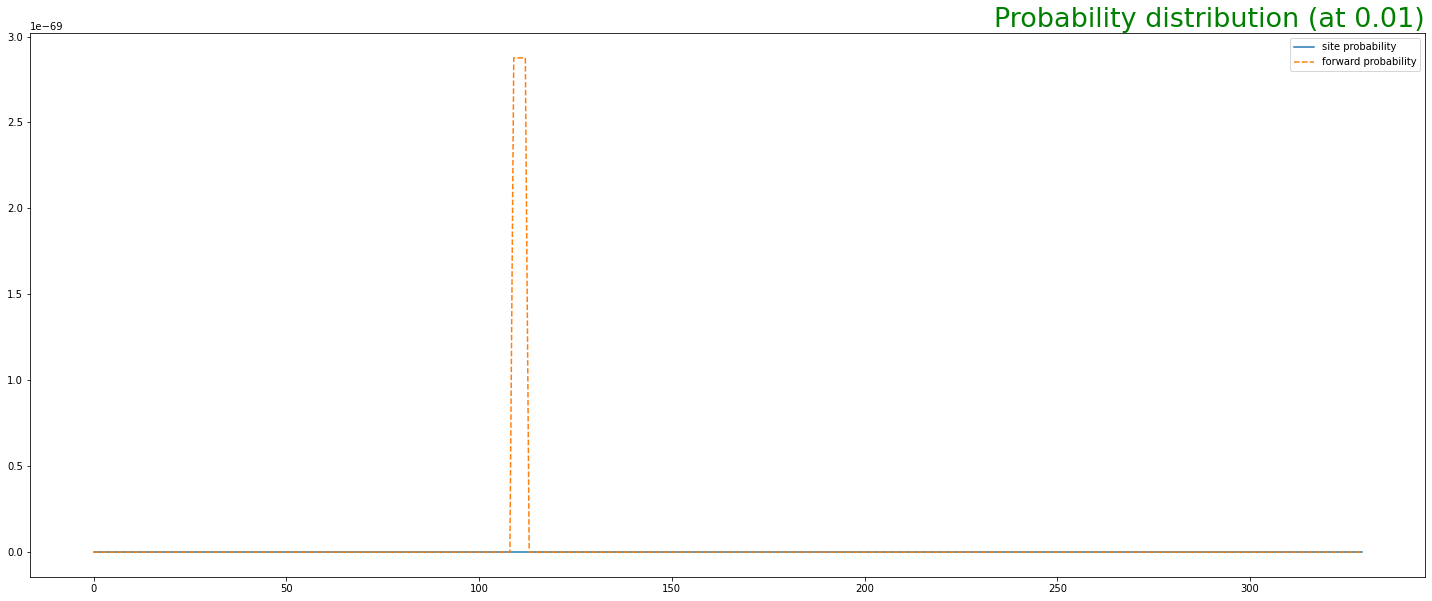

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(25,10)) 
plt.plot(probability_site1)
plt.plot(forward_site1,"--")
plt.title("Probability distribution (at 0.01)",fontsize=27,color="green",loc="right")
plt.legend(["site probability","forward probability"])

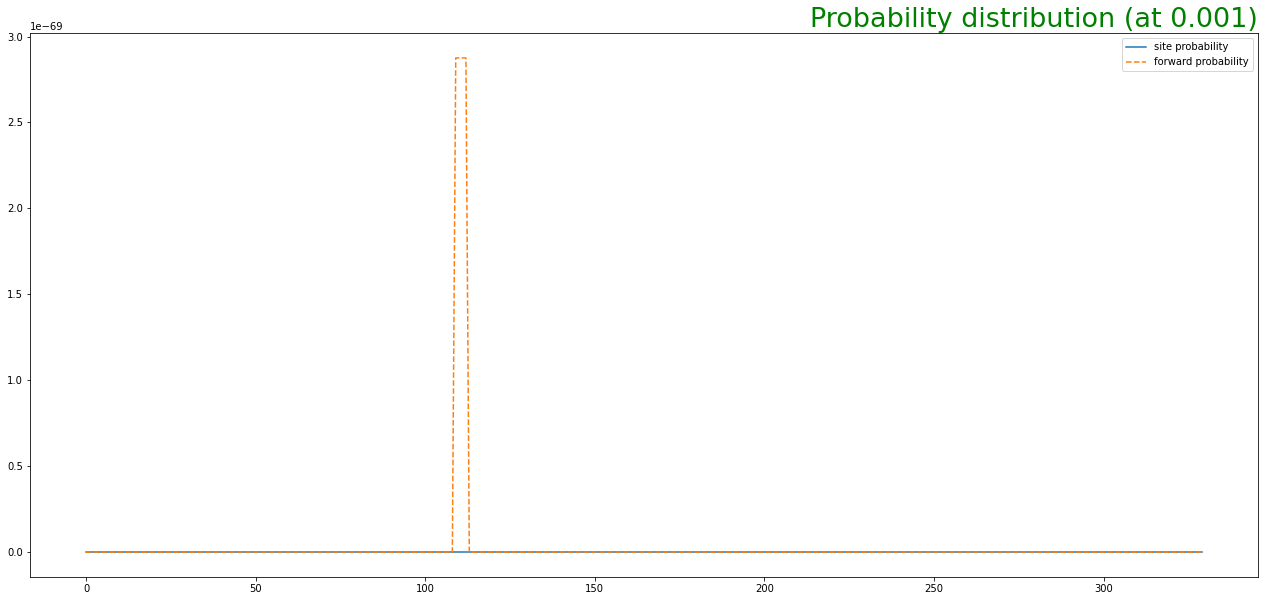

In [ ]:
plt.figure(figsize=(22,10)) 
plt.plot(probability_site2)
plt.plot(forward_site2,"--")
plt.title("Probability distribution (at 0.001)",fontsize=27,color="green",loc="right")
plt.legend(["site probability","forward probability"])

## Sequence generation

5. Write a program that generates sequence for this model.

In [ ]:
# state transition probabilities
probability_bg_site = 0.01
probability_bg_e = 0.01
probability_bg_bg = 1-probability_bg_site-probability_bg_e
probability_site_e = 0.01
probabiliy_site_bg = 1-probability_site_e

In [ ]:
import numpy as np

def sequence_generation(probability_bg_site,probability_bg_e,probability_site_e):
  seq_model = "" # for the future modeled sequence

  # let's form the four states: 'beginning'(B), 'background'(Bg), 'site'(S), 'end'(E)
  state = "b"
  
  # Part 1. Define the state (it is clearly shown according to Figure 1).
  while True:
    random_value = np.random.rand() # to randomly generate any num on the half-open interval/half-closed interval [0,1) / A,C,G,T
    if state == "b": # beginning -> background(bg)/site
      if random_value >= probability_bg_site:
        state = "bg"
      else:
        state = "s"
    elif state == "bg": # .. bg -> bg/site/end
      if random_value >= probability_bg_site:
        state = "bg"
      elif random_value >= 1-probability_bg_e:
        state = "e"
      else:
        state = "s"
    elif state == "s": # .. site -> bg/end # (site -> site is not assumed here)
      if random_value >= 1-probability_site_e:
        state = "e"
      else:
        state = "bg"
    elif state == "e":
        return(seq_model) 
    
    # Part 2. Analysis and A/C/G/T letter identification.
    # A,C,G,T / 0.25*4 / [0,1]
    if state == "bg":
      if random_value < 0.25: # [0..0.25) - A
        seq_model += "a"
      elif random_value >= 0.25 and random_value < 0.5: # [0.25..0.5) - C
        seq_model += "c"
      elif random_value >= 0.5 and random_value < 0.75: # [0.5..0.75) - G
        seq_model += "g"
      elif random_value >= 0.75: # [0.75..1] - T
        seq_model += "t"      
    elif state == "s":
      seq_model += "acgt"

In [ ]:
modeled_seq = sequence_generation(0.01,0.01,0.01)
modeled_seq

'tttcaaccggtcaggccttaatcataaatttgcctcagggtgcagcttttgcgtgataagatcgtgacgttccctggtagatgtactcacttaccttgacgttttggcctctattcggtttacggacaccgagggccaaggaggctttcgggaccatacctagtagatgcatccagtaaaaactacagggcttgcagagcgatacaccggccgctattgtcgatcagttatacagttattaaggtccagacgtcaaagtgagtcaggggagagttcatggctccgacgtggagtccccgggggagcgcaatctgagctgtcttttatgcgcacgcgtggacaagagtttgcggaccttatcagtagtgcgcacacatttttaaaagtacagcgttaccgagaaaatatagacaccctgatttggctgcggtcaggtaaatccacccatcgatagcttcttccatgagcaaagcacacgcctctttgtaggccacggcatgaagtgatgaaagccaaacgtcatcaatgttcaggggaaggctcgcaattgacgggataccaccgcgattgcttgctgggtgcgcctgtaacttgagataactcgtattctcgcaatattgagttccgctaccgtttcgtgcagtgactggccacctcgagttcggacgttagcgactgctccttaatcactcgcattgtagctctgtcggacgtgtgcactagtgcatttctccagcaattatcgccacgtggccgctaacgtcgcccgtgatttttgagccccaactcccgagaattcgccacgggtctgacgtcaagcctgatgcttggactaaggattgaggaaaagcggtcttaagattttccggatctaataacgtagaaattgcagcagggccgagttcccgagagccatccggaacgtttgcatgccccgactcctaatgagtgtgttatctgggcccgacaggggtgaggaataaccctaacccacgtgct

In [ ]:
len(modeled_seq)

18649

In [ ]:
## Sample 1
sample_seq1 = sequence_generation(0.001,0.01,0.01)

In [ ]:
len(sample_seq1)

78992

In [ ]:
## Sample 2
sample_seq2 = sequence_generation(0.1,0.01,0.01)

In [ ]:
len(sample_seq2)

334